## Baseball stats and team performance or: How I came to love baseball data 

When I was a kid, my family spent several vacations in the USA. Sports geek that I was, I consumed as much US sports as I could. Whatever was on TV, I watched it. I had a only a vague idea of the language, didn't get every single rule or umpire decision but who cares? I liked it anyway. One thing though left me starring in true bewilderment: Baseball stats. What WERE these strange numbers? I had no clue whatsoever. 

So initially, I wasn't very enthusiastic when I had to choose the dataset for this project. Titanic? Hmmm. Baseball? Uh well, let's take baseball. But boy I was in for a surprise.

### The Question

Data from 1871 on? What the...? Salaries?? Team data, individual data, attendance??? There is such a wealth of data that it took me a moment to settle on one question. I mean you could try to track the statistical effects of the so called Steroid Era. Or  Eventually I decided upon: 

Which of these baseball stats does have an influence on team performance measured as the winning percentage during the regular season: On-Base Percentage (OBP), Slugging Percentage (SLG), Walks plus Hits per Inning Pitched (WHIP) or Payroll?

Explanatory variables: OBP, SLG, WHIP, Payroll
Response variable: Winning Percentage (Regular season)

### The Data 

In [34]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [35]:
#Starting point is the teams data 
#Create a master dataframe for the analysis named master_df

master_df = pd.read_csv('baseballdatabank-master/core/Teams.csv')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [36]:
#Choose a subset of the teams data (year >= 1985)

master_df = master_df[master_df['yearID'] >= 1985]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1917 to 2804
Data columns (total 48 columns):
yearID            888 non-null int64
lgID              888 non-null object
teamID            888 non-null object
franchID          888 non-null object
divID             888 non-null object
Rank              888 non-null int64
G                 888 non-null int64
Ghome             888 non-null float64
W                 888 non-null int64
L                 888 non-null int64
DivWin            860 non-null object
WCWin             624 non-null object
LgWin             860 non-null object
WSWin             860 non-null object
R                 888 non-null int64
AB                888 non-null int64
H                 888 non-null int64
2B                888 non-null int64
3B                888 non-null int64
HR                888 non-null int64
BB                888 non-null int64
SO                888 non-null float64
SB                888 non-null float64
CS                888 non-

In [37]:
#Calculate the response variable
from decimal import *

def roundDecimals(column, i):
    return column.apply(lambda x: float(round(Decimal(x), i)))
    
master_df["winning_percentage"] = (master_df['W'] / master_df['G']) * 100
master_df['winning_percentage'] = roundDecimals(master_df['winning_percentage'], 1) 
master_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,40.7
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,51.6
1919,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,49.7
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,55.6
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,52.1


In [38]:
#For convenience, reset the index to standard integer index
master_df = master_df.reset_index(drop=True)
master_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,40.7
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,51.6
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,49.7
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,55.6
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,52.1


### 1. On-Base Percentage

"On-Base Percentage (OBP) measures the most important thing a batter can do at the plate: not make an out. Since a team only gets 27 outs per game, making outs at a high rate isn’t a good thing — that is, if a team wants to win. Players with high on-base percentages avoid making outs and reach base at a high rate, prolonging games and giving their team more opportunities to score."

In [39]:
#The formula for OBP is relatively simple and could be easily calculated by using existing metrics in our dataframe.
master_df['OBP'] = (master_df['H'] + master_df['BB'] + master_df['HBP'])/(master_df['AB'] + master_df['BB'] + master_df['HBP'] + master_df['SF'] )
print(master_df.info())
#But looking at master_df.info() we see that we only have got 480 values for "HBP" and "SF" and thus for "OBP" too - 408 are missing. What's going on?

HBP_and_SF_missing = master_df[(master_df['HBP'].isnull()) | (master_df['SF'].isnull())]['yearID']
HBP_and_SF_missing.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 50 columns):
yearID                888 non-null int64
lgID                  888 non-null object
teamID                888 non-null object
franchID              888 non-null object
divID                 888 non-null object
Rank                  888 non-null int64
G                     888 non-null int64
Ghome                 888 non-null float64
W                     888 non-null int64
L                     888 non-null int64
DivWin                860 non-null object
WCWin                 624 non-null object
LgWin                 860 non-null object
WSWin                 860 non-null object
R                     888 non-null int64
AB                    888 non-null int64
H                     888 non-null int64
2B                    888 non-null int64
3B                    888 non-null int64
HR                    888 non-null int64
BB                    888 non-null int64
SO                    88

408

In [40]:
print(set(HBP_and_SF_missing))

#From 1985 to 1992 the MLB had 26 teams, from 1993 to 1997 28 teams, and from 1998 on 30 teams. So that's 8*26 + 5*28 + 2*30 which is 408. 
#Hmm, okay all "HBP" and "SF" values for years 1985 to 1999 are missing.

{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}


In [41]:
#Batting.csv to the rescue! Batting.csv offers individual batting stats. We will use that to fill in our missing values
batting = pd.read_csv('baseballdatabank-master/core/Batting.csv')

#Values for 1985 to 1999
batting = batting[(batting['yearID'] >= 1985) & (batting['yearID'] < 2000 )]

In [42]:
#Group by team and year 
batting_totals = batting.groupby(['teamID', 'yearID']).sum()
len(batting_totals)

408

In [43]:
#408, check. Apply the formula for On-Base Percentage

batting_totals['OBP'] = (batting_totals['H'] + batting_totals['BB'] + batting_totals['HBP'])/(batting_totals['AB'] + batting_totals['BB'] + batting_totals['HBP'] + batting_totals['SF'] )

In [44]:
#Delete 'G' and 'stint' column as they are of no value

batting_totals.drop(['G', 'stint'], 1, inplace=True)

In [45]:
#Reshape the dataframe to easily merge with master_df

batting_totals = batting_totals.reset_index()
batting_totals.sort_values(['yearID', 'teamID'], inplace=True)
batting_totals= batting_totals.reset_index(drop=True)


In [46]:
#Merge 
master_df = master_df.combine_first(batting_totals)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 54 columns):
2B                    888 non-null int64
3B                    888 non-null int64
AB                    888 non-null int64
BB                    888 non-null int64
BBA                   888 non-null int64
BPF                   888 non-null int64
CG                    888 non-null int64
CS                    888 non-null float64
DP                    888 non-null float64
DivWin                860 non-null object
E                     888 non-null int64
ER                    888 non-null int64
ERA                   888 non-null float64
FP                    888 non-null float64
G                     888 non-null int64
GIDP                  408 non-null float64
Ghome                 888 non-null float64
H                     888 non-null int64
HA                    888 non-null int64
HBP                   888 non-null float64
HR                    888 non-null int64
HRA                

In [47]:
#Round to third digit

master_df['OBP'] = roundDecimals(master_df['OBP'], 3)


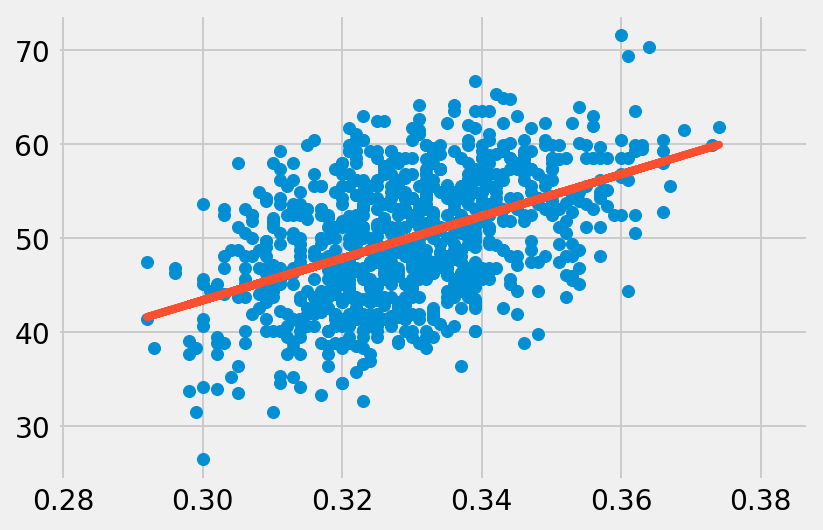

0.47454959372096761

In [48]:
# Write a function to plot a scatterplot, add a best fit line and print out Pearson's r 

def scatter_plot(df, expl_v, resp_v):
    with plt.style.context('fivethirtyeight'):
        plt.scatter(expl_v, resp_v)
        m, b = np.polyfit(expl_v, resp_v, 1)
        plt.plot(expl_v, resp_v, '.')
        plt.plot(expl_v, m*expl_v + b, '-')
        plt.show()
    return resp_v.corr(expl_v)
    
scatter_plot(master_df, master_df['OBP'], master_df['winning_percentage'])

### 2. Slugging Percentage

In [49]:
# The formula for SLG is the following

master_df['SLG'] = (master_df['H'] + master_df['2B'] + master_df['3B'] * 2 + master_df['HR'] * 3) / master_df['AB']
master_df['SLG'] = roundDecimals(master_df['SLG'], 3)


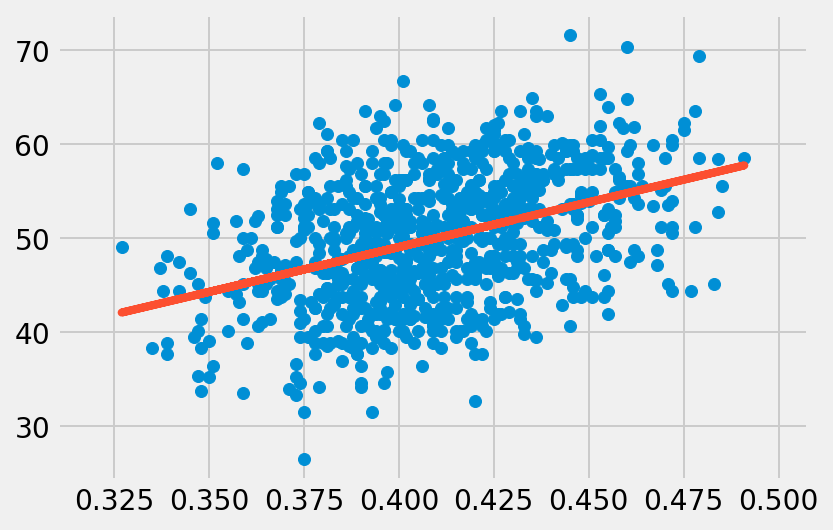

0.40416535513500584

In [50]:
scatter_plot(master_df, master_df['SLG'], master_df['winning_percentage'])


### 3. WHIP

In [52]:
#WHIP = BBA + HA / IP

master_df['WHIP'] = (master_df['BBA'] + master_df['HA'])/(master_df['IPouts'] / 3)
master_df.head()

,2B,3B,AB,BB,BBA,BPF,CG,CS,DP,DivWin,...,name,park,teamID,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage,yearID,SLG,WHIP
0,213,28,5526,553,642,105,9,52.0,197.0,N,...,Atlanta Braves,Atlanta-Fulton County Stadium,ATL,ATL,ATL,ATL,40.7,1985,0.363,1.478380
1,234,22,5517,604,568,97,32,43.0,168.0,N,...,Baltimore Orioles,Memorial Stadium,BAL,BAL,BAL,BAL,51.6,1985,0.430,1.435179
2,292,31,5720,562,540,104,35,27.0,161.0,N,...,Boston Red Sox,Fenway Park II,BOS,BOS,BOS,BOS,49.7,1985,0.429,1.387406
3,215,31,5442,648,514,100,22,51.0,202.0,N,...,California Angels,Anaheim Stadium,CAL,CAL,CAL,CAL,55.6,1985,0.386,1.350034
4,247,37,5470,471,569,104,20,56.0,152.0,N,...,Chicago White Sox,Comiskey Park,CHA,CHW,CHA,CHA,52.1,1985,0.392,1.364576


In [53]:
master_df['WHIP'] = roundDecimals(master_df['WHIP'], 3)

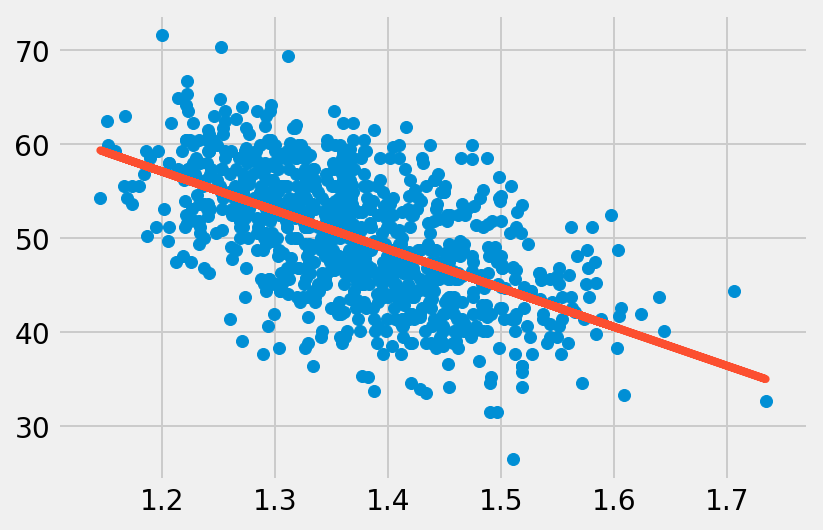

-0.57084230757607546

In [54]:
scatter_plot(master_df, master_df['WHIP'], master_df['winning_percentage'])

### 4. Payroll

In [55]:
salaries = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [56]:
payroll = salaries.groupby(['teamID', 'yearID']).sum()
payroll.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

In [57]:
master_df = master_df.join(payroll, on=['teamID', 'yearID'])
master_df.rename(columns={'salary':'payroll'}, inplace=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 57 columns):
2B                    888 non-null int64
3B                    888 non-null int64
AB                    888 non-null int64
BB                    888 non-null int64
BBA                   888 non-null int64
BPF                   888 non-null int64
CG                    888 non-null int64
CS                    888 non-null float64
DP                    888 non-null float64
DivWin                860 non-null object
E                     888 non-null int64
ER                    888 non-null int64
ERA                   888 non-null float64
FP                    888 non-null float64
G                     888 non-null int64
GIDP                  408 non-null float64
Ghome                 888 non-null float64
H                     888 non-null int64
HA                    888 non-null int64
HBP                   888 non-null float64
HR                    888 non-null int64
HRA                

In [25]:
#To normalize the data first create a empty column...
master_df['norm_payroll'] = pd.Series()

#... and then fill it with the normalized value for each season

grouped = master_df.groupby('yearID')

for name, group in grouped:
    master_df['norm_payroll'].update((group['payroll'] - group['payroll'].min())/(group['payroll'].max() - group['payroll'].min()))

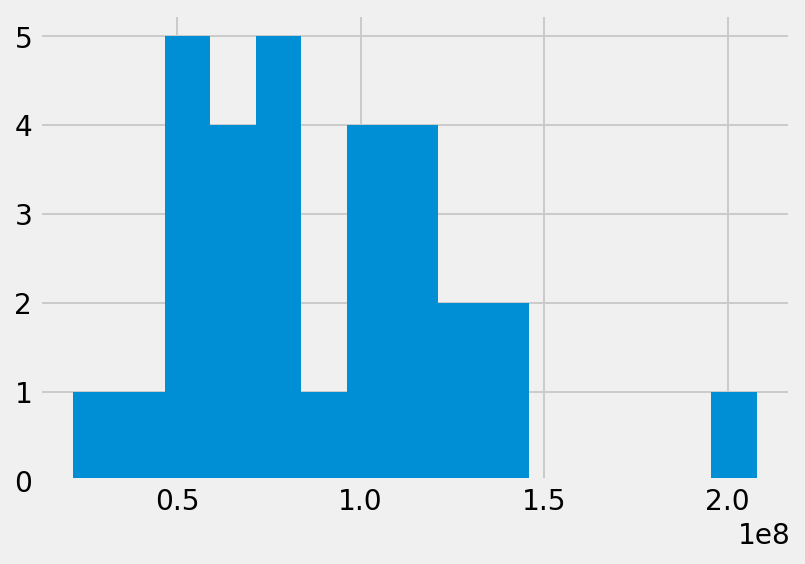

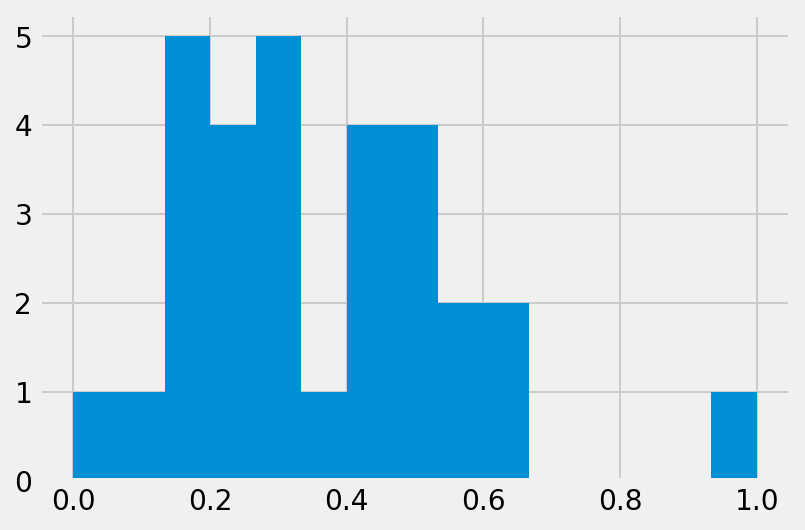

In [26]:
#Make sure this worked. Test on 2008 data
with plt.style.context('fivethirtyeight'):
    plt.hist(master_df[master_df['yearID'] == 2008]['payroll'], bins=15)
    plt.show()
    plt.hist(master_df[master_df['yearID'] == 2008]['norm_payroll'], bins=15)
    plt.show()

In [ ]:
#Looks good

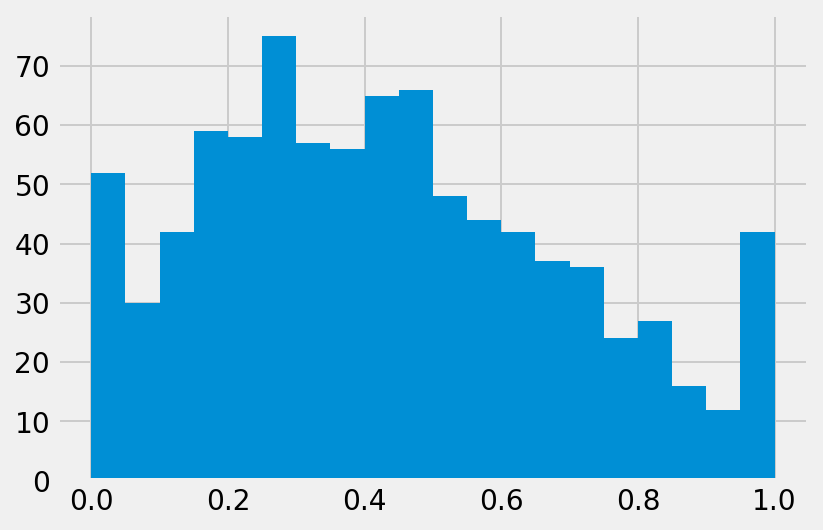

In [27]:
with plt.style.context('fivethirtyeight'):

    plt.hist(master_df['norm_payroll'], bins=20)
    plt.show()

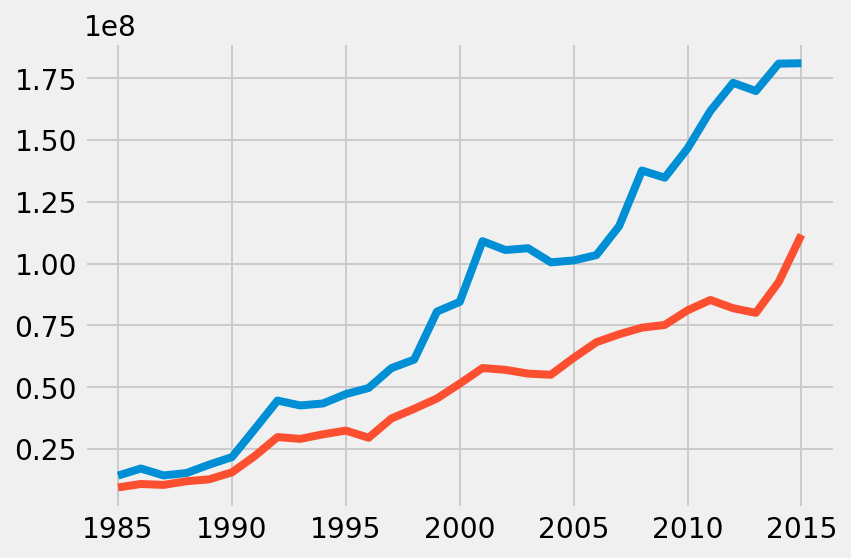

In [28]:

top5 = master_df.groupby('yearID')['payroll'].nlargest(5)
rest = master_df.drop(top5.index.levels[1]).groupby('yearID')['payroll']

with plt.style.context('fivethirtyeight'):
    plt.plot(top5.groupby(level = 'yearID').median().index, top5.groupby(level = 'yearID').median().values, rest.median().index, rest.median().values)
    plt.show()


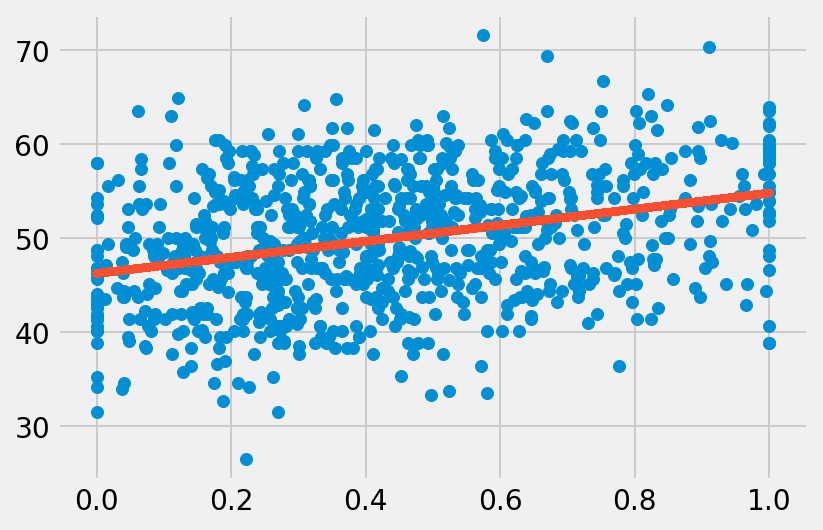

0.32432930442513092

In [29]:
scatter_plot(master_df, master_df['norm_payroll'], master_df['winning_percentage'])

In [30]:
result = sm.ols(formula='winning_percentage ~ OBP + SLG + WHIP + norm_payroll', data=master_df).fit()
print(result.summary())

NameError: name 'sm' is not defined

In [ ]:
import plotly as py
from plotly.graph_objs import *
py.offline.init_notebook_mode()

trace1 = Scatter3d(
    x = master_df['OBP'],
    y= master_df['winning_percentage'],
    z= master_df['WHIP'],
    text= master_df['name'] + ' ' + master_df['yearID'].map(str),
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref= 0.06,
        size= master_df['norm_payroll'],
        color = master_df['winning_percentage'] ,
        colorscale = 'Viridis',
        colorbar = dict(title = 'test'),
        line=dict(color='rgb(140, 140, 170)')
    )
)

data=[trace1]
layout=dict(height=800, width=900, title='test')
fig=dict(data=data, layout=layout)
#py.offline.iplot(fig, filename='3DBubble')